In [37]:
import pandas as pd
import numpy as np

movies = pd.read_csv("../movies.csv/movies.csv")

movies['year'] = movies['release_date'].str[0:4]
movies = movies.loc[movies['year'].notna()]
movies['year'] = movies['year'].astype(int)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711558 entries, 0 to 773741
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    711558 non-null  int64  
 1   title                 711557 non-null  object 
 2   genres                526695 non-null  object 
 3   original_language     711558 non-null  object 
 4   overview              601177 non-null  object 
 5   popularity            711558 non-null  float64
 6   production_companies  352311 non-null  object 
 7   release_date          711558 non-null  object 
 8   budget                711558 non-null  float64
 9   revenue               711558 non-null  float64
 10  runtime               677947 non-null  float64
 11  status                711558 non-null  object 
 12  tagline               107730 non-null  object 
 13  vote_average          711558 non-null  float64
 14  vote_count            711558 non-null  float64
 15  

In [38]:
movies.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,year
0,338953,Fantastic Beasts: The Secrets of Dumbledore,Fantasy-Adventure-Action,en,Professor Albus Dumbledore knows the powerful ...,8020.641,Warner Bros. Pictures-Heyday Films,2022-04-06,200000000.0,380000000.0,...,Released,Return to the magic.,6.8,1410.0,Eddie Redmayne-Jude Law-Mads Mikkelsen-Ezra Mi...,1930s,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,/7ucaMpXAmlIM24qZZ8uI9hCY0hm.jpg,675353-526896-752623-639933-453395-648579-6295...,2022
1,526896,Morbius,Action-Science Fiction-Fantasy,en,Dangerously ill with a rare blood disorder and...,4123.569,Columbia Pictures-Avi Arad Productions-Matt To...,2022-03-30,75000000.0,161000000.0,...,Released,A new Marvel legend arrives.,6.4,1424.0,Jared Leto-Matt Smith-Adria Arjona-Jared Harri...,vampire-based on comic,/6JjfSchsU6daXk2AKX8EEBjO3Fm.jpg,/gG9fTyDL03fiKnOpf2tr01sncnt.jpg,675353-752623-338953-532710-763285-629542-5456...,2022
2,675353,Sonic the Hedgehog 2,Action-Adventure-Family-Comedy,en,After settling in Green Hills Sonic is eager t...,3990.395,Original Film-Blur Studio-Marza Animation Plan...,2022-03-30,110000000.0,375000000.0,...,Released,Welcome to the next level.,7.7,1849.0,James Marsden-Ben Schwartz-Tika Sumpter-Natash...,sequel-based on video game-hedgehog-live actio...,/6DrHO1jr3qVrViUO6s6kFiAGM7.jpg,/egoyMDLqCxzjnSrWOz50uLlJWmD.jpg,629542-526896-752623-763285-338953-639933-4533...,2022
3,752623,The Lost City,Action-Adventure-Comedy-Romance,en,A reclusive romance novelist was sure nothing ...,3888.712,Paramount-Fortis Films-3dot Productions-Exhibi...,2022-03-24,74000000.0,164289828.0,...,Released,The adventure is real. The heroes are not.,6.8,959.0,Sandra Bullock-Channing Tatum-Daniel Radcliffe...,duringcreditsstinger,/neMZH82Stu91d3iqvLdNQfqPPyl.jpg,/1Ds7xy7ILo8u2WWxdnkJth1jQVT.jpg,526896-639933-675353-532710-629542-338953-7632...,2022
4,818397,Memory,Action-Thriller-Crime,en,Alex an assassin-for-hire finds that he's beco...,3785.216,Black Bear Pictures-Welle Entertainment-Savill...,2022-04-28,0.0,8597928.0,...,Released,His mind is fading. His conscience is clear.,7.3,200.0,Liam Neeson-Guy Pearce-Taj Atwal-Harold Torres...,assassin-remake,/QaNLpq3Wuu2yp5ESsXYcQCOpUk.jpg,/kiH3KPWi7BaRMvdAigcwrUFViHl.jpg,639933-752623-526896-532710-661231-420821-8101...,2022


In [39]:
movies = movies.loc[movies['status'] == 'Released']
movies = movies[['id', 'title', 'genres', 'original_language', 'budget', 'revenue', 'runtime', 'vote_average', 'year']]

movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709742 entries, 0 to 773741
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 709742 non-null  int64  
 1   title              709741 non-null  object 
 2   genres             525117 non-null  object 
 3   original_language  709742 non-null  object 
 4   budget             709742 non-null  float64
 5   revenue            709742 non-null  float64
 6   runtime            676133 non-null  float64
 7   vote_average       709742 non-null  float64
 8   year               709742 non-null  int32  
dtypes: float64(4), int32(1), int64(1), object(3)
memory usage: 51.4+ MB


,id,title,genres,original_language,budget,revenue,runtime,vote_average,year
0,338953,Fantastic Beasts: The Secrets of Dumbledore,Fantasy-Adventure-Action,en,200000000.0,380000000.0,142.0,6.8,2022
1,526896,Morbius,Action-Science Fiction-Fantasy,en,75000000.0,161000000.0,105.0,6.4,2022
2,675353,Sonic the Hedgehog 2,Action-Adventure-Family-Comedy,en,110000000.0,375000000.0,122.0,7.7,2022
3,752623,The Lost City,Action-Adventure-Comedy-Romance,en,74000000.0,164289828.0,112.0,6.8,2022
4,818397,Memory,Action-Thriller-Crime,en,0.0,8597928.0,114.0,7.3,2022


Перевіримо, чи має дата фрейм пропущені значення:

In [40]:
movies.isnull().values.any()

True

Тепер перевіримо наявність від'ємних значень:

In [41]:
(movies.select_dtypes(include=np.number) < 0).values.any()

True

In [42]:
movies[movies['budget'] < 0].head()

,id,title,genres,original_language,budget,revenue,runtime,vote_average,year


<AxesSubplot:>

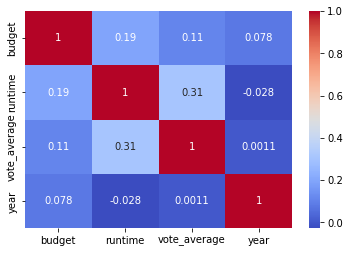

In [60]:
import seaborn as sb

corr = movies[['budget', 'runtime', 'vote_average', 'year']].corr()
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sb.color_palette("coolwarm", as_cmap=True))

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [45]:
movies = movies.loc[movies['revenue'].round(0).astype(int) != 0]
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17497 entries, 0 to 773711
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 17497 non-null  int64  
 1   title              17497 non-null  object 
 2   genres             17182 non-null  object 
 3   original_language  17497 non-null  object 
 4   budget             17497 non-null  float64
 5   revenue            17497 non-null  float64
 6   runtime            17415 non-null  float64
 7   vote_average       17497 non-null  float64
 8   year               17497 non-null  int32  
dtypes: float64(4), int32(1), int64(1), object(3)
memory usage: 1.3+ MB


In [46]:
numeric_columns = movies.select_dtypes(include=['number']).columns

means = movies[numeric_columns].mean()

movies[numeric_columns] = movies[numeric_columns].fillna(means)

movies.dropna(inplace=True)

In [47]:

X = movies[['budget', 'runtime', 'vote_average', 'genres', 'original_language', 'year']] #original_language
Y = movies[['revenue']]



In [48]:
res = X.genres.str.get_dummies(sep='-').add_prefix('genres_')

X = pd.concat([X, res], axis = 1)
X.drop(columns=['genres'], inplace=True)
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17182 entries, 0 to 773711
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   budget                  17182 non-null  float64
 1   runtime                 17182 non-null  float64
 2   vote_average            17182 non-null  float64
 3   original_language       17182 non-null  object 
 4   year                    17182 non-null  int32  
 5   genres_Action           17182 non-null  int64  
 6   genres_Adventure        17182 non-null  int64  
 7   genres_Animation        17182 non-null  int64  
 8   genres_Comedy           17182 non-null  int64  
 9   genres_Crime            17182 non-null  int64  
 10  genres_Documentary      17182 non-null  int64  
 11  genres_Drama            17182 non-null  int64  
 12  genres_Family           17182 non-null  int64  
 13  genres_Fantasy          17182 non-null  int64  
 14  genres_History          17182 non-nul

,budget,runtime,vote_average,original_language,year,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,...,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science Fiction,genres_TV Movie,genres_Thriller,genres_War,genres_Western
0,200000000.0,142.0,6.8,en,2022,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,75000000.0,105.0,6.4,en,2022,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,110000000.0,122.0,7.7,en,2022,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,74000000.0,112.0,6.8,en,2022,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,114.0,7.3,en,2022,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [49]:
lang = X.original_language.str.get_dummies(sep='-').add_prefix('language_')

X = pd.concat([X, lang], axis = 1)
X.drop(columns=['original_language'], inplace=True)
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17182 entries, 0 to 773711
Columns: 103 entries, budget to language_zh
dtypes: float64(3), int32(1), int64(99)
memory usage: 13.6 MB


,budget,runtime,vote_average,year,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,...,language_tg,language_th,language_tl,language_tr,language_uk,language_ur,language_vi,language_xh,language_xx,language_zh
0,200000000.0,142.0,6.8,2022,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,75000000.0,105.0,6.4,2022,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,110000000.0,122.0,7.7,2022,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74000000.0,112.0,6.8,2022,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,114.0,7.3,2022,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
import scipy.stats as st

columns = [
    'budget',
    'runtime',
    'vote_average',
    'year'
]

for column in columns:
    _, p = st.kstest(X[column], 'norm')
    if p > 0.05:
        print(column + ' should be removed from analysis')
    else:
        print(column + ' is important factor')

budget is important factor
runtime is important factor
vote_average is important factor
year is important factor


In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)

In [52]:
LinReg = LinearRegression().fit(X_train, Y_train)

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

PolReg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
PolReg.fit(X_train, Y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [54]:
predictions = [LinReg.predict(X_test),
               PolReg.predict(X_test)]

In [55]:
from sklearn.metrics import r2_score
from numpy import sqrt

RSE_scores = []
R2_scores = []

for prediction in predictions:
    y_true = np.array(Y_test)
    y_predicted = np.array(prediction)
    RSE_scores.append(sqrt((np.sum(np.square(y_true - y_predicted)))/(len(y_true) - 2)))
    R2_scores.append(r2_score(Y_test, prediction))

print('RSE: ', RSE_scores)
print('R2: ', R2_scores)
print('RSE index min: ', np.argmin(RSE_scores) +1, RSE_scores[np.argmin(RSE_scores)])
print('R2 index max: ', np.argmax(R2_scores) + 1, R2_scores[np.argmax(R2_scores)])

RSE:  [75071024.07338433, 74014033.92944829]
R2:  [0.5724315265625546, 0.5843869799610419]
RSE index min:  2 74014033.92944829
R2 index max:  2 0.5843869799610419
